In [ ]:
# Reference: https://github.com/NicolasHug/Surprise

In [26]:
import io  # needed because of weird encoding of u.item file

from surprise import KNNBaseline
from surprise import Dataset
from surprise import get_dataset_dir
from surprise import accuracy
from surprise.model_selection import KFold

import matplotlib.pyplot as plt
import numpy as np

In [18]:
def read_item_names():
    """Read the u.item file from MovieLens 100-k dataset and return two
    mappings to convert raw ids into movie names and movie names into raw ids.
    """

    file_name = get_dataset_dir() + '/ml-100k/ml-100k/u.item'
    rid_to_name = {}
    name_to_rid = {}
    with io.open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
            name_to_rid[line[1]] = line[0]

    return rid_to_name, name_to_rid


In [19]:
# First, train the algortihm to compute the similarities between items
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNBaseline(sim_options=sim_options)
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [20]:
# Read the mappings raw id <-> movie name
rid_to_name, name_to_rid = read_item_names()

# Retrieve inner id of the movie Toy Story
toy_story_raw_id = name_to_rid['Toy Story (1995)']
toy_story_inner_id = algo.trainset.to_inner_iid(toy_story_raw_id)

# Retrieve inner ids of the nearest neighbors of Toy Story.
toy_story_neighbors = algo.get_neighbors(toy_story_inner_id, k=10)

# Convert inner ids of the neighbors into names.
toy_story_neighbors = (algo.trainset.to_raw_iid(inner_id)
                       for inner_id in toy_story_neighbors)
toy_story_neighbors = (rid_to_name[rid]
                       for rid in toy_story_neighbors)

In [21]:
print('The 10 nearest neighbors of Toy Story are:')
for movie in toy_story_neighbors:
    print(movie)

The 10 nearest neighbors of Toy Story are:
Beauty and the Beast (1991)
Raiders of the Lost Ark (1981)
That Thing You Do! (1996)
Lion King, The (1994)
Craft, The (1996)
Liar Liar (1997)
Aladdin (1992)
Cool Hand Luke (1967)
Winnie the Pooh and the Blustery Day (1968)
Indiana Jones and the Last Crusade (1989)


In [27]:
testset = trainset.build_testset()
predictions = algo.test(testset)
# RMSE should be low as we are biased
accuracy.rmse(predictions, verbose=True)  # ~ 0.68 (which is low)
x = []
# We can also do this during a cross-validation procedure!
print('CV procedure:')

kf = KFold(n_splits=3)
for i, (trainset_cv, testset_cv) in enumerate(kf.split(data)):
#     print('fold number', i + 1)
    algo.fit(trainset_cv)
    
    print('On testset,', end='  ')
    predictions = algo.test(testset_cv)
    
    x.append(accuracy.rmse(predictions, verbose=True))


RMSE: 0.5575
CV procedure:
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
On testset,  RMSE: 0.9298
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
On testset,  RMSE: 0.9279
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
On testset,  RMSE: 0.9304


[0.9298139436699757, 0.9279331196402789, 0.9303692867473744]

ValueError: x and y must have same first dimension, but have shapes (3,) and (5,)

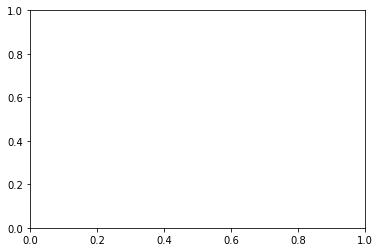

In [42]:
fig, ax = plt.subplots()
ax.plot(range(0, 3), x)
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.show()

In [36]:
x = []

kf = KFold(n_splits=5)
for i, (trainset_cv, testset_cv) in enumerate(kf.split(data)):
#     print('fold number', i + 1)
    algo.fit(trainset_cv)

    predictions = algo.test(testset_cv)
    x.append(accuracy.rmse(predictions, verbose=True))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9148
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9250
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9054
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9199
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9115


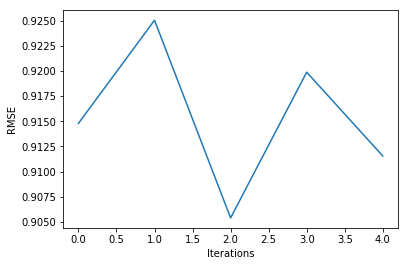

In [37]:
fig, ax = plt.subplots()
ax.plot(range(0, 5), x)
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.show()

In [ ]:
x = []

for kk in range(10):
    algo = KNNBaseline(sim_options=sim_options, k = kk)
    algo.fit(trainset)
    testset = trainset.build_testset()
    predictions = algo.test(testset)
    x.append(accuracy.rmse(predictions, verbose=True))

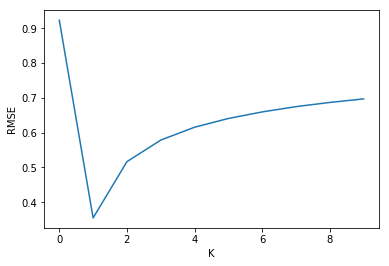

In [54]:
fig, ax = plt.subplots()
ax.plot(range(0, 10), x)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()

In [55]:
x = []

for kk in range(10):
    algo = KNNBaseline(sim_options={'name': 'cosine', 'user_based': False}, k = kk)
    algo.fit(trainset)
    testset = trainset.build_testset()
    predictions = algo.test(testset)
    x.append(accuracy.rmse(predictions, verbose=True))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9227
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7439
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7024
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7010
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7031
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7052
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7075
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7098
Estimating biases using als...
Computing

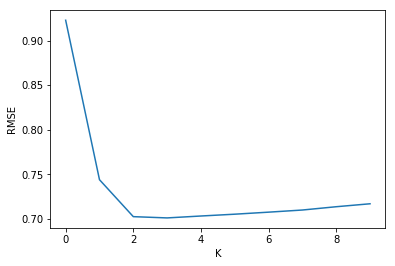

In [56]:
fig, ax = plt.subplots()
ax.plot(range(0, 10), x)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()

In [59]:
x = []

for kk in range(10):
    algo = KNNBaseline(sim_options={'name': 'pearson', 'user_based': False}, k = kk)
    algo.fit(trainset)
    testset = trainset.build_testset()
    predictions = algo.test(testset)
    x.append(accuracy.rmse(predictions, verbose=True))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9227
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5044
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4949
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5068
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5186
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5306
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5407
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5492
Estimating biases using als...
C

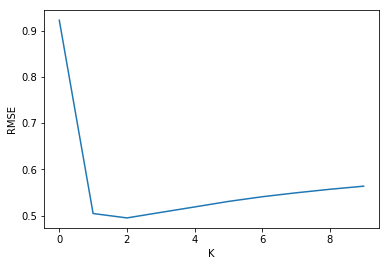

In [60]:
fig, ax = plt.subplots()
ax.plot(range(0, 10), x)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()

In [61]:
x = []

for kk in range(10):
    algo = KNNBaseline(sim_options={'name': 'msd', 'user_based': False}, k = kk)
    algo.fit(trainset)
    testset = trainset.build_testset()
    predictions = algo.test(testset)
    x.append(accuracy.rmse(predictions, verbose=True))

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9227
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.1810
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3035
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3739
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.4200
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.4541
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.4813
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5025
Estimating biases using als...
Computing the msd similarity matr

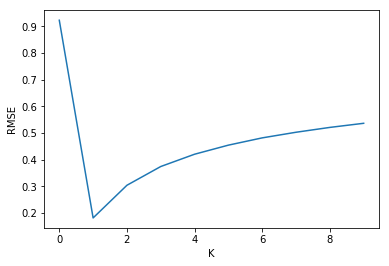

In [62]:
fig, ax = plt.subplots()
ax.plot(range(0, 10), x)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()